In [1]:
###ARTIST EXAMPLE###
# artist_url = "https://api.spotify.com/v1/artists/"

# pprint(requests.get(artist_url + "66CXWjxzNUsdJxJ2JdwvnR", headers = token_headers).json())

In [6]:
###TRACKS EXAMPLE###
track_url = "https://api.spotify.com/v1/tracks/"

pprint(requests.get(track_url + "6ocbgoVGwYJhOv1GgI9NsF", headers = token_headers).json())

{'album': {'album_type': 'album',
           'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/66CXWjxzNUsdJxJ2JdwvnR'},
                        'href': 'https://api.spotify.com/v1/artists/66CXWjxzNUsdJxJ2JdwvnR',
                        'id': '66CXWjxzNUsdJxJ2JdwvnR',
                        'name': 'Ariana Grande',
                        'type': 'artist',
                        'uri': 'spotify:artist:66CXWjxzNUsdJxJ2JdwvnR'}],
           'available_markets': ['AD',
                                 'AE',
                                 'AR',
                                 'AT',
                                 'AU',
                                 'BE',
                                 'BG',
                                 'BH',
                                 'BO',
                                 'BR',
                                 'CA',
                                 'CH',
                                 'CL',
                                 

In [3]:
###PLAYLIST EXAMPLE###
# playlist_id = "37i9dQZEVXbLRQDuF5jeBp"

# pprint(requests.get(f"https://api.spotify.com/v1/playlists/{playlist_id}", headers = token_headers).json())

In [2]:
import requests
import spotipy
from requests.auth import HTTPBasicAuth
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pprint import pprint

In [3]:
from client import client_id, client_secret

In [6]:
top_artist_df = pd.read_csv("Top Country CSV/top2018.csv")
top_artist_df.head()

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,6DCZcSspjsKoFjzjrWoCd,God's Plan,Drake,0.754,0.449,7,-9.211,1,0.1090,0.0332,0.000083,0.552,0.357,77.169,198973,4
1,3ee8Jmje8o58CHK66QrVC,SAD!,XXXTENTACION,0.740,0.613,8,-4.880,1,0.1450,0.2580,0.003720,0.123,0.473,75.023,166606,4
2,0e7ipj03S05BNilyu5bRz,rockstar (feat. 21 Savage),Post Malone,0.587,0.535,5,-6.090,0,0.0898,0.1170,0.000066,0.131,0.140,159.847,218147,4
3,3swc6WTsr7rl9DqQKQA55,Psycho (feat. Ty Dolla $ign),Post Malone,0.739,0.559,8,-8.011,1,0.1170,0.5800,0.000000,0.112,0.439,140.124,221440,4
4,2G7V7zsVDxg1yRsu7Ew9R,In My Feelings,Drake,0.835,0.626,1,-5.833,1,0.1250,0.0589,0.000060,0.396,0.350,91.030,217925,4


In [4]:
token_url = "https://accounts.spotify.com/api/token"
headers = {'content-type': 'application/x-www-form-urlencoded'}

token_params = {"grant_type" : "client_credentials"}

token_json = requests.post(token_url, params = token_params, headers = headers, auth = (client_id, client_secret)).json()
token = token_json['access_token']

token_json

{'access_token': 'BQAuAX-j6Q0isRceLBP7QChgjiMDzYJpjy91eUwbtw5Kbl9nJ0ncFku715NARv1XZQKk58XZQrEKlr0KaGE',
 'token_type': 'Bearer',
 'expires_in': 3600,
 'scope': ''}

In [5]:
token_headers = {'authorization': f"Bearer {token}"}

artist_name_list = []
artist_id_list = []
artist_followers_list = []
genre_list = []
genre_popularity = []

search_url = "https://api.spotify.com/v1/search"

print("----------------------\nRetrieving Artist ID\n----------------------")

for artist in top_artist_df["artists"]:
    search_param = {"q" : artist,
                   "type" : "artist",
                   "limit" : 1}
    
    try:
        artist_json = requests.get(search_url, params = search_param, headers = token_headers).json()
        artist_id = artist_json["artists"]["items"][0]["id"]
        artist_name = artist_json["artists"]["items"][0]["name"]
        artist_follower = artist_json["artists"]["items"][0]["followers"]["total"]
        genres = artist_json["artists"]["items"][0]["genres"]
        
        if artist_id not in artist_id_list:
            artist_id_list.append(artist_id)
            artist_name_list.append(artist_name)
            artist_followers_list.append(artist_follower)
            
            for genre in genres:
                if genre not in genre_list:
                    genre_list.append(genre)
                    genre_popularity.append(1)
                    
                else:
                    genre_popularity[genre_list.index(genre)] += 1
                
            print(f"Artist ID Found | {artist_id} | {artist_name}")
            
        else:   
            print("Artist ID in list already")
        
    except IndexError:
        print("Could Not Find Artist ID")

----------------------
Retrieving Artist ID
----------------------


NameError: name 'top_artist_df' is not defined

In [9]:
genre_popularity_df = pd.DataFrame({
    "Genre" : genre_list,
    "Genre Count" : genre_popularity
})

genre_popularity_df["Genre by Artist Percentage"] = (genre_popularity_df["Genre Count"]/len(artist_name_list)) * 100

genre_popularity_df = genre_popularity_df.sort_values(by = "Genre by Artist Percentage", ascending = False).head(15).reset_index()

genre_popularity_df

,index,Genre,Genre Count,Genre by Artist Percentage
0,7,pop,44,62.857143
1,12,dance pop,24,34.285714
2,4,rap,18,25.714286
3,13,post-teen pop,16,22.857143
4,3,pop rap,11,15.714286
5,22,tropical house,10,14.285714
6,8,edm,10,14.285714
7,2,hip hop,9,12.857143
8,30,trap music,8,11.428571
9,25,latin,8,11.428571


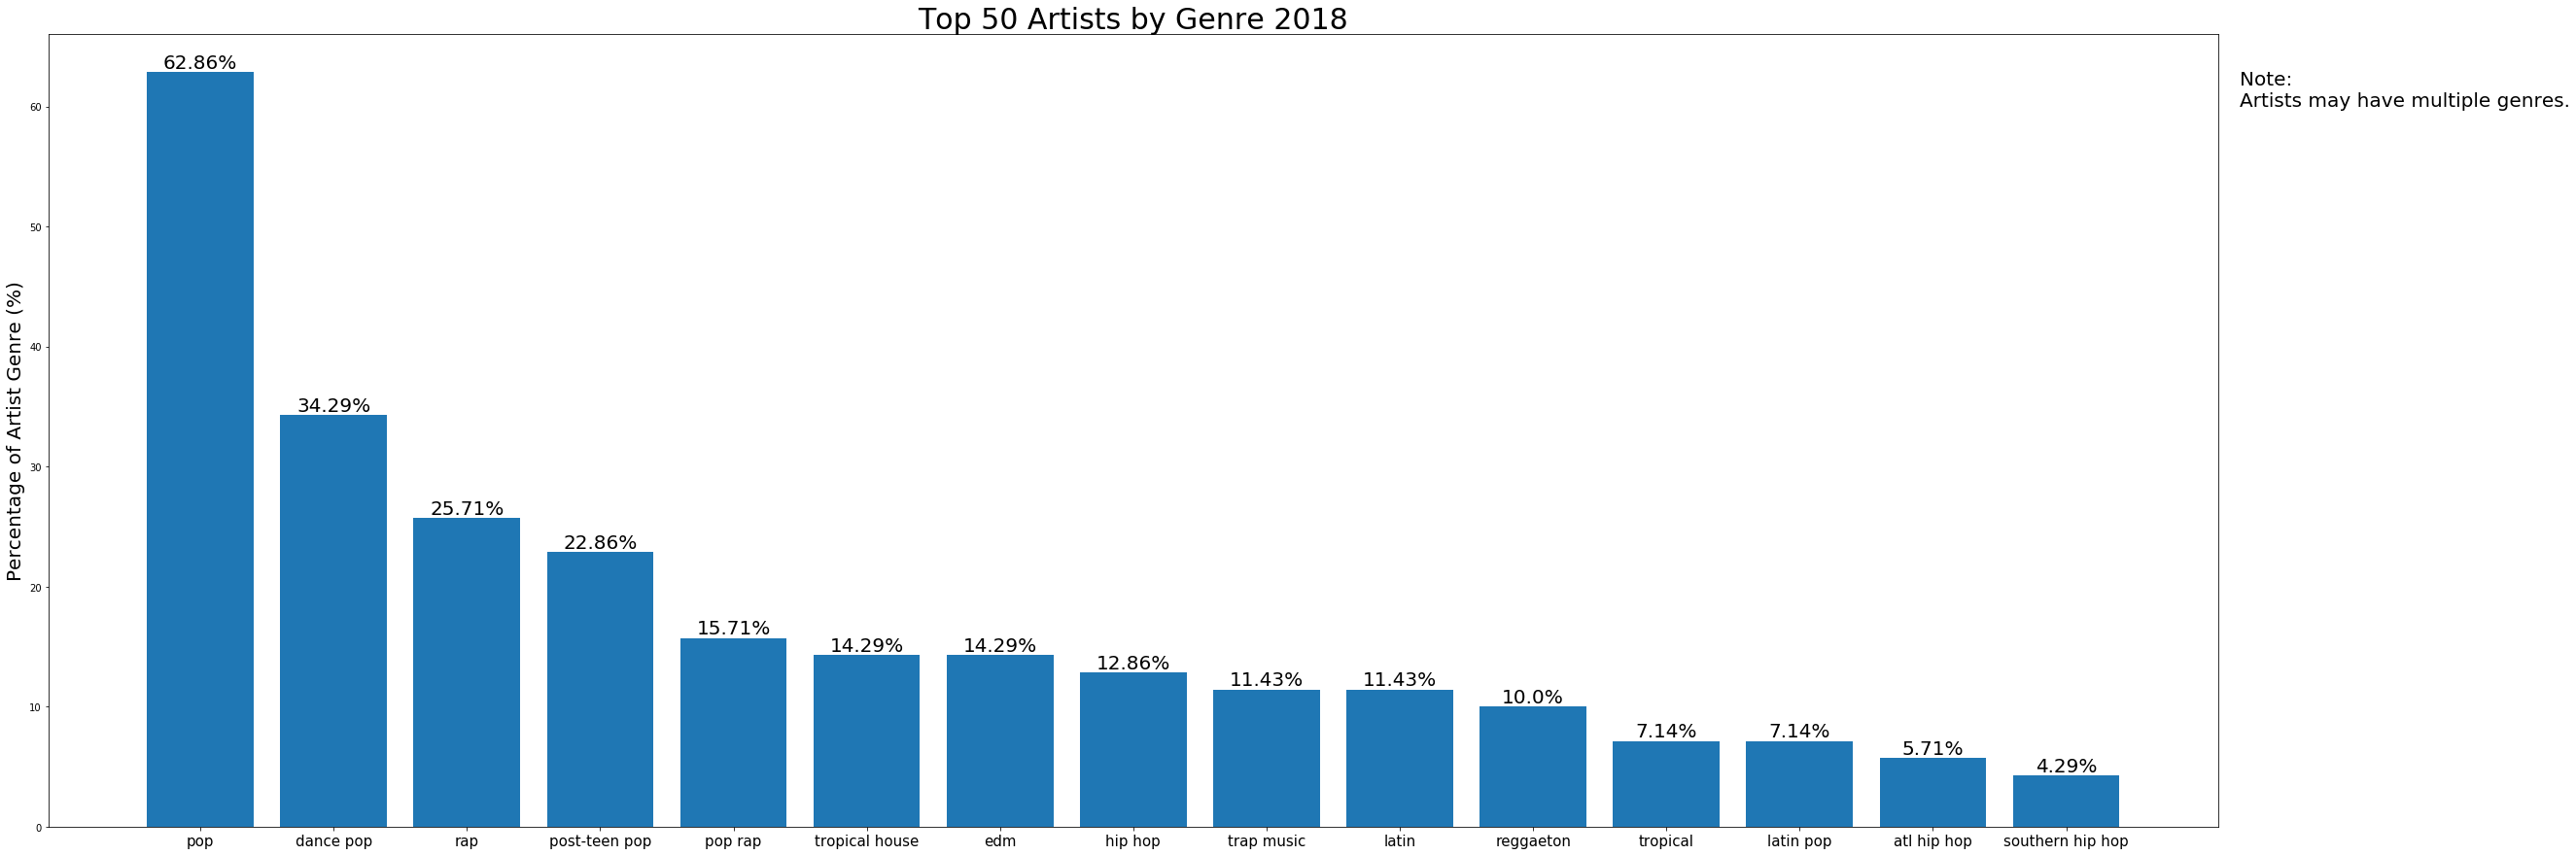

In [10]:
fig, ax = plt.subplots(figsize = (40,15))
x_axis = np.arange(15)

ax.bar(x_axis, genre_popularity_df["Genre by Artist Percentage"])
plt.xticks(x_axis, genre_popularity_df["Genre"], Fontsize = 15)
plt.ylabel("Percentage of Artist Genre (%)", Fontsize = 20)
plt.title("Top 50 Artists by Genre 2018", Fontsize = 30)
plt.text(max(x_axis) + 1.3, 60, "Note:\nArtists may have multiple genres.", Fontsize = 20)

rects = ax.patches

for rect in rects:
    height = rect.get_height()
    width = rect.get_x() + 0.4
    if height > 0:
        ax.text(width, height, f'{round(height,2)}%', Fontsize = 20, ha = 'center', va = 'bottom')
    else:
         ax.text(width, height, f'{round(height,2)}%', Fontsize = 20, ha = 'center', va = 'top')

plt.show()